In [32]:
import requests
yelp = open('../../yelp.txt').read().split('\n')[3]
import pandas as pd
from CRA import *
c = CRA()

In [9]:
#Define API key and endpoint.  Then define header
api_key = yelp
endpoint = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': 'bearer %s' % api_key}
parameters = {'limit': 50, 'offset':50, 'location': 'Seattle'}
response = requests.get(url = endpoint, params = parameters, headers = headers)

L = []
total = 1000
for i in range(total // 50):
    parameters = {'limit' : 50, 'offset' : 50 * i, 'location' : 'Seattle'}
    R = requests.get(url = endpoint, params = parameters, headers = headers).json()['businesses']
    L = L + R
    


In [5]:
#convert json string to dictionary
business_data = response.json()
print(business_data.keys())

dict_keys(['businesses', 'total', 'region'])


In [6]:
business_data['businesses']

[{'id': '7F473Qfy0eRD6_5lgfWTSA',
  'alias': 'taste-of-india-seattle',
  'name': 'Taste of India',
  'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/HW44UOamjSJ86E2gd0XzTQ/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/taste-of-india-seattle?adjust_creative=6vdYi1Kgx9XqvIMey-5Gxg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=6vdYi1Kgx9XqvIMey-5Gxg',
  'review_count': 1530,
  'categories': [{'alias': 'indpak', 'title': 'Indian'}],
  'rating': 4.5,
  'coordinates': {'latitude': 47.669083, 'longitude': -122.317484},
  'transactions': ['delivery', 'pickup'],
  'price': '$$',
  'location': {'address1': '5517 Roosevelt Way NE',
   'address2': '',
   'address3': '',
   'city': 'Seattle',
   'zip_code': '98105',
   'country': 'US',
   'state': 'WA',
   'display_address': ['5517 Roosevelt Way NE', 'Seattle, WA 98105']},
  'phone': '+12065281575',
  'display_phone': '(206) 528-1575',
  'distance': 5039.494501568876},
 {'id': 'FrHhYevaOhs40xpuOpQiHg

In [7]:
for biz in business_data['businesses']:
    print(biz)

{'id': '7F473Qfy0eRD6_5lgfWTSA', 'alias': 'taste-of-india-seattle', 'name': 'Taste of India', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/HW44UOamjSJ86E2gd0XzTQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/taste-of-india-seattle?adjust_creative=6vdYi1Kgx9XqvIMey-5Gxg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=6vdYi1Kgx9XqvIMey-5Gxg', 'review_count': 1530, 'categories': [{'alias': 'indpak', 'title': 'Indian'}], 'rating': 4.5, 'coordinates': {'latitude': 47.669083, 'longitude': -122.317484}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '5517 Roosevelt Way NE', 'address2': '', 'address3': '', 'city': 'Seattle', 'zip_code': '98105', 'country': 'US', 'state': 'WA', 'display_address': ['5517 Roosevelt Way NE', 'Seattle, WA 98105']}, 'phone': '+12065281575', 'display_phone': '(206) 528-1575', 'distance': 5039.494501568876}
{'id': 'FrHhYevaOhs40xpuOpQiHg', 'alias': 'canlis-seattle', 'name': 'Canlis', 'image

In [9]:
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
class CRA:
    def __init__(self):
        self.url = 'https://gisdata.seattle.gov/server/rest/services/COS/CommunityReportingAreas/MapServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'
        self.json = requests.get(self.url).json()
        self.geometry = {f['attributes']['GEN_ALIAS'] : f['geometry']['rings'] for f in self.json['features']}
    def in_poly(p, V):
        return sum(min(V[i][1], V[i+1][1]) <= p[1] < max(V[i][1], V[i+1][1])
                   and (V[i+1][0] - V[i][0]) * (p[1] - V[i][1]) / (V[i+1][1] - V[i][1]) < p[0] - V[i][0] for i in range(len(V) - 1)) % 2
    def poly_plot(V):
        for i in range(len(V) - 1):
            plt.plot([V[i][1], V[i+1][1]], [V[i][0], V[i+1][0]], 'k')
    def print_cra(self, c):
        for ring in self.geometry[c]:
            CRA.poly_plot(ring)
        plt.title(c)
        plt.xlabel('Latitude')
        plt.ylabel('Longitude')
        plt.ticklabel_format(useOffset=False)
        plt.show()
    def to_cra(self, gps):
        for c in self.geometry:
            for ring in self.geometry[c]:
                if CRA.in_poly(gps[::-1], ring):
                    return c
        return 'Not Found'

In [15]:
features = ['name', 'price', 'categories', 'coordinates']
df = pd.DataFrame(L)[features]
df = df[df.price.notna()]
df.price = df.price.map(len)
df.categories = df.categories.map(lambda L : [D['alias'] for D in L])
df.coordinates = df.coordinates.map(dict.values).map(list).map(lambda L : L[::-1])
df['cra'] = df.coordinates.map(c.to_cra)
df

,name,price,categories,coordinates,cra
0,Pike Place Chowder,2,"[seafood, soup]","[-122.34112, 47.60939]",Downtown Commercial Core
1,Piroshky Piroshky,1,"[bakeries, russian]","[-122.34231, 47.60991]",Belltown
2,The Pink Door,2,"[italian, wine_bars, seafood]","[-122.3425, 47.61028]",Belltown
3,Paseo,2,"[caribbean, cuban, sandwiches]","[-122.35031, 47.65849]",Fremont
4,Ellenos Real Greek Yogurt,1,[icecream],"[-122.34058, 47.608912]",Downtown Commercial Core
...,...,...,...,...,...
995,Enat Ethiopian Restaurant,1,[ethiopian],"[-122.3120443, 47.713467]",Olympic Hills/Victory Heights
996,Bookstore Bar and Cafe,2,"[bars, newamerican, breakfast_brunch]","[-122.33678, 47.605121]",Downtown Commercial Core
997,Aluel Cellars,2,"[winetastingroom, wine_bars]","[-122.321928218007, 47.62097744904]",Capitol Hill
998,Mission Cantina,2,"[bars, mexican, venues]","[-122.38689, 47.58225]",Alki/Admiral


In [ ]:
c.make_city()

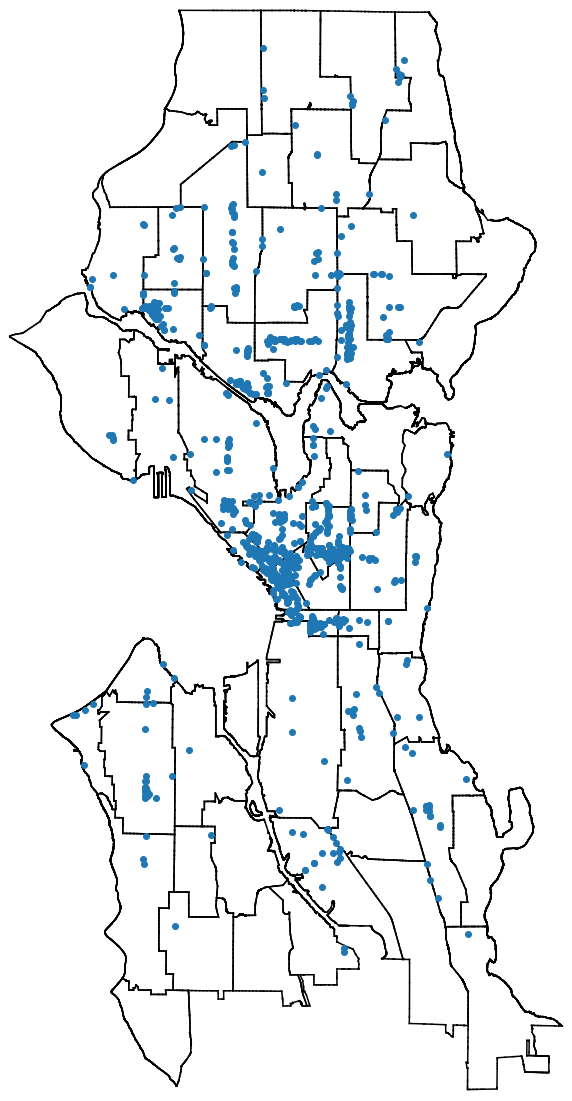

In [39]:
import numpy as np
C = np.array(list(df.coordinates))

plt.figure(figsize = [10, 20])
margin = 0.001
im = plt.imread('sea.png')
xlim = [c.xlim[0] - margin, c.xlim[1] + margin]
ylim = [c.ylim[0] - margin, c.ylim[1] + margin]
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.axis('off')
plt.imshow(im, extent = (*xlim, *ylim), aspect = 'auto')
plt.scatter(C[:, 0], C[:, 1])
plt.show()

In [16]:
seattle_restaurants = df.to_csv('./project_5.csv')